<a href="https://colab.research.google.com/github/githubleelabobby/ML-project-/blob/main/MY_FIRST_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MY FIRST ML PROJECT-Regression model to predict the aqueous solubility of small molecules**

#**Load Data**

In [96]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# **DATA PREPARATION**

### **Data separation as X and Y**

In [97]:
#SEPARATE THE Y FROM X
Y=df["logS"]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [98]:
#SEPARATE THE X FROM Y AND SO I MUST DROP Y
X=df.drop("logS",axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### **DATA SPLITTING**

In [99]:
#so your basically gonna split your data set into training set and testing set
from sklearn.model_selection import train_test_split #The train_test_split function of the sklearn. model_selection package in Python splits
                                                     #arrays or matrices into random subsets for train and test data, respectively.

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2 ,random_state=100)
#so here on splitting what happens is 80%of your data goes into a container called your training set and
#remaining 20% goes into a container called testing set[ratio:80:20]
#here we know 80%of 1144=915

In [100]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [101]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [102]:
Y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [103]:
Y_test

822    -3.380
118    -8.010
347    -2.160
1123   -1.170
924    -0.730
        ...  
1114   -4.130
427    -9.018
711    -0.600
4      -3.040
948    -2.900
Name: logS, Length: 229, dtype: float64

#**MODEL BUILDING**


## **Linear Regression**

###Training The Model

In [104]:
from sklearn.linear_model import LinearRegression  #=>training set is used to build a model
                                                   #=>testing set is used to serve as an unknown data which you wanna test training set
lr=LinearRegression()
lr.fit(X_train,Y_train)#we wanna train the empty linear regression model on the following dataset namely x_train and y_train


LinearRegression()

**Applying a model to make a prediction**

In [90]:
Y_lr_train_pred=lr.predict(X_train)#here we want to make prediction on the x train
Y_lr_test_pred=lr.predict(X_test)#here we want to make prediction on the x_test
Y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [89]:
Y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

### **Evaluate Model Performance**

In [105]:
from sklearn.metrics import mean_squared_error, r2_score #here we are going to find the mean square error.r2_score =>regression score function

lr_train_mse=mean_squared_error(Y_train,Y_lr_train_pred)
lr_train_r2 = r2_score(Y_train, Y_lr_train_pred)

lr_test_mse=mean_squared_error(Y_test,Y_lr_test_pred)
lr_test_r2=r2_score(Y_test,Y_lr_test_pred)
print("LR MSE(TRAIN)=",lr_train_mse)
print("LR R2(TRAIN)=",lr_train_r2)
print("LR MSE(TEST)=",lr_test_mse)
print("LR R2(TEST)=",lr_test_r2)

LR MSE(TRAIN)= 1.0075362951093687
LR R2(TRAIN)= 0.7645051774663391
LR MSE(TEST)= 1.0206953660861033
LR R2(TEST)= 0.7891616188563282


In [87]:
lr_results = pd.DataFrame(["LinearRegression", lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ["Method","Training MSE","Training R2","Test MSE","Test R2"] #this step is to change the coloumn names

## **RANDOM FOREST**

In [84]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162


### **Training The Model**

In [106]:
from sklearn.ensemble import RandomForestRegressor #here we use regressor cause we are building regression
                                                  #models as our y (logS) is quantitative

rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(X_train,Y_train)


RandomForestRegressor(max_depth=2, random_state=100)

### **Applying A Model To Make a Prediction**

In [45]:
Y_rf_train_pred =rf.predict(X_train)
Y_rf_test_pred = rf.predict(X_test)

### **Evaluate Model Performance**

In [46]:
from sklearn.metrics import mean_squared_error, r2_score #here we are going to find the mean square error

rf_train_mse=mean_squared_error(Y_train,Y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, Y_rf_train_pred)

rf_test_mse=mean_squared_error(Y_test,Y_rf_test_pred)
rf_test_r2=r2_score(Y_test,Y_rf_test_pred)


In [82]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Method","Training MSE","Training R2","Test MSE","Test R2"] #this step is to change the coloumn names
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.028228,0.759669,1.407688,0.709223


##**Model Comparison**

In [48]:
#TO CONCATINATE THE MODEL EVALUATION OF LINEAR REGRESSION AND RANDOM FOREST TOGETHER
df_models = pd.concat([lr_results, rf_results], axis=0) #axis 0 will will club data vertically
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162
0,Random forest,1.028228,0.759669,1.407688,0.709223


In [81]:
df_models.reset_index(drop=True) #to make the index value correct!!!!

,Method,Training MSE,Training R2,Test MSE,Test R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162
1,Random forest,1.028228,0.759669,1.407688,0.709223


# **Data Visualization Of Prediction Results**

Text(0.5, 0, 'Experimental LogS')

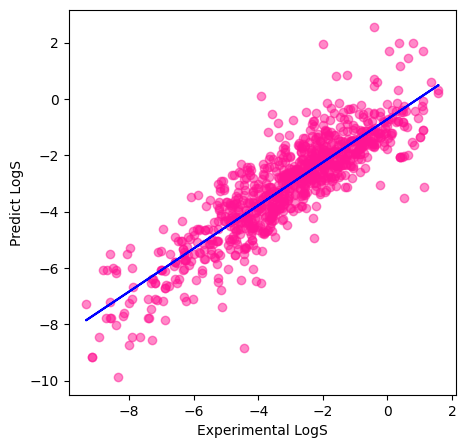

In [128]:
import matplotlib.pyplot as plt
#TO ADD A TREND LINE WE NEED TO IMPORT NUMPY
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train,y=Y_lr_train_pred,c="#FF1493",alpha=0.5) #"#FF1493"=>changes the scatter plot colour to dark pink

z=np.polyfit(Y_train,Y_lr_train_pred , 1) #polyfit=>hepls to fit our data in polynomial function
p=np.poly1d(z) #poly1d=>1 dimentionalpolynomial class


plt.plot(Y_train,p(Y_train),"blue")
#here x and y axis is not labelled so we do the below step
plt.ylabel("Predict LogS")
plt.xlabel("Experimental LogS")